Author: Agnieszka Bielecka

Date: 12.06.2023

# Exploratory Exercise and Fitness Data Analysis

## Introduction

"Exercise and Fitness Metrics Dataset" is a comprehensive dataset that captures various factors related to exercise, fitness, and weight management.

The dataset contains information about different types of performed exercises (duration, calories burned during those exercises, weather, and intensity of exercise), and details about the exerciser (dream weight, actual weight, age, gender, heart rate, and BMI).

These data bring more knowledge about what affects the performance of exercises.

#### Analysis Questions

Before we ask questions, we should define how to understand the excellent performance of the exercise. According to our data, we are able to understand it by two main factors - calories burned and heart rate.

An efficient workout should burn many calories and keep our heart rate at an adequate level (depending on our resting heart rate or age).

1. What level of heart rate is the most recommended for people of a particular age?
2. Which exercises are the most efficient (burn the most calories)?
3. What is given people's height?
4. Is there any correlation between given variables?
5. What is the distribution of actual weight in the given dataset?
6. How given people are categorized in relation to their BMI?

#### Sources


* [Dataset from Kaggle](https://www.kaggle.com/datasets/aakashjoshi123/exercise-and-fitness-metrics-dataset)

* [Information about Heart Rate](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm)

* [Information about BMI](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

<hr>

## Preparing the Environment

The project required importing libraries and the dataset.

In [1]:
# Import libraries and add an alias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

In [2]:
# Read data in CSV file
dataset = pd.read_csv(r"C:\Users\abiel\Downloads\Exercise-and-Fitness-Metrics-Dataset\exercise_dataset.csv")

<hr>

## Data Exploration

#### Quick dataset overview

In [3]:
# Preview first 5 rows of dataset
dataset.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [4]:
# Preview last 5 rows of dataset
dataset.tail()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
3859,3860,Exercise 5,154.113144,98.147291,96.745133,20,Female,22,139,32.447764,Cloudy,7
3860,3861,Exercise 4,486.392768,97.598957,92.700573,21,Female,49,160,26.602475,Rainy,5
3861,3862,Exercise 4,264.307731,94.946612,96.778936,57,Male,56,167,31.435348,Rainy,9
3862,3863,Exercise 9,185.951870,64.743906,68.662889,58,Female,60,128,19.774614,Rainy,1
3863,3864,Exercise 7,116.360417,56.757424,59.833403,35,Male,22,134,29.581330,Rainy,1


As you can see, this dataset contains mainly quantitative data, some of them can be easily group into segments (age, heart rate, exercise intensity).

There is also a three columns with categorical data.


Let's have a look info shape(), info() and describe() to get more information.

#### Size of the dataset

In [5]:
dataset.shape

(3864, 12)

There is 3864 rows and 12 columns in the dataset.

#### Summarised information of dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


Data types matches to the corresponding values. 

There are no rows without any values.

The dataset is pretty small, and so is memory usage.

<hr>

## Data Cleaning

Before we start analysing data we need to check their current quality and clean them.

Let's check again if there are no null values and look for duplicates.

<b>Missing values & Duplicated data<b/>

In [7]:
# Find number of null values for all columns
dataset.isnull().sum()

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

In [8]:
# Find number of duplicate values
dataset.duplicated().sum()

0

According to the results, dataset has zero null values and duplicates.

<hr>

## Descriptive Statistics

#### Dataset describtion

In [9]:
dataset.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


The dataset seems to be pretty accurate at first look. 

The sample studied is small, but there are no outliers (the mean and the median are very similar). 

Whatmore, the dispersion of the data around the mean is relatively small.

<hr>

## Exploratory Data Analysis

### 1. What level of heart rate is the most recommended for people of a particular age?

According to the [Centers for Disease Control and Prevention](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm), the most recommended heart rate for moderate-intensity physical activity can be calculated by subtracting age from 220.

We use this method to find out if workouts in our datasets were done under or above this level of heart rate.

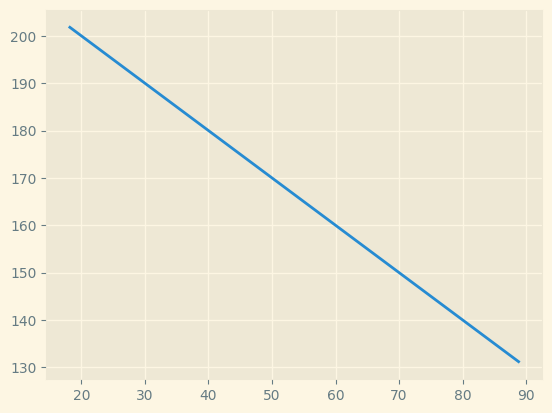

In [10]:
# Create a line graph with recommended max heart rate for ages between 18 and 90
heart_art_by_age = {
    "age": [],
    "heart rate": []
}

for age in range(18, 90):
    heart_rate = 220 - age
    heart_art_by_age["age"].append(age)
    heart_art_by_age["heart rate"].append(heart_rate)

plt.style.use('Solarize_Light2')
plt.plot(heart_art_by_age["age"], heart_art_by_age["heart rate"])

In [11]:
# Create a new column "Recommended heart rate"
dataset["Recommended max heart rate"] = 220 - dataset["Age"]
dataset.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity,Recommended max heart rate
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5,175
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5,195
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4,200
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10,187
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3,191


In [12]:
# Compare recommended heart rate to actual heart rate
comparing = dataset["Heart Rate"] > dataset["Recommended max heart rate"]
comparing.value_counts()

False    3623
True      241
Name: count, dtype: int64

In [13]:
# Calculate the percentage of workouts below and above the recommended max heart rate
above = round((comparing.value_counts()[True] / len(comparing)) * 100, 1)
below = 100 - above
print(f"{above}% of workouts above recommended max heart rate")
print(f"{below}% of workouts below recommended max heart rate")

6.2% of workouts above recommended max heart rate
93.8% of workouts below recommended max heart rate


Observation:
* With aging, it is recommended to exercise at a lower heart rate range,
* 3623 (93.8%) workouts were done under the recommended max heart rate,
* 241 (6.2%) workouts were done above the recommended max heart rate.

### 2. Which exercises are the most efficient (burn the most calories)?

In [14]:
# Group by exercises to check average calories burn for every exercise
calories_by_exercise = dataset.groupby("Exercise")["Calories Burn"].mean()
calories_by_exercise_data = calories_by_exercise.to_dict()
calories_by_exercise_df = pd.DataFrame(list(calories_by_exercise_data.items()), columns=['Exercise', 'Average Calories Burned'])
calories_by_exercise

Exercise
Exercise 1     290.644109
Exercise 10    294.298761
Exercise 2     300.101287
Exercise 3     295.770273
Exercise 4     315.026142
Exercise 5     305.357542
Exercise 6     302.971544
Exercise 7     307.585135
Exercise 8     301.700059
Exercise 9     305.971948
Name: Calories Burn, dtype: float64

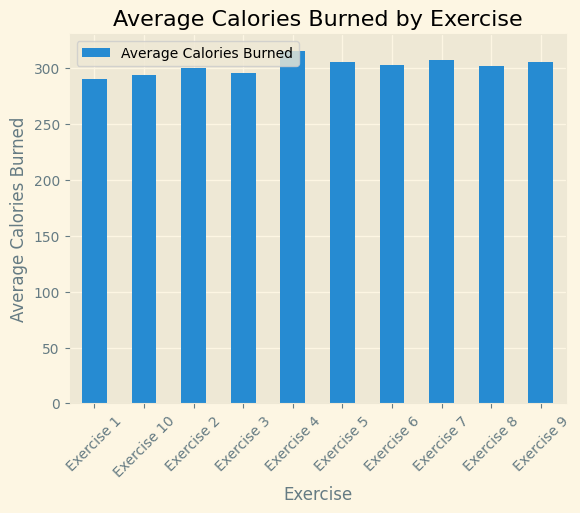

In [15]:
# Create a bar chart
calories_by_exercise_df.plot(x='Exercise', y='Average Calories Burned', kind='bar')
plt.style.use('Solarize_Light2')
plt.xlabel('Exercise')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned by Exercise')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Count the number of workouts for each exercise
count_exercise = dataset.groupby("Exercise")["Calories Burn"].count()
count_exercise

Exercise
Exercise 1     403
Exercise 10    398
Exercise 2     345
Exercise 3     385
Exercise 4     371
Exercise 5     404
Exercise 6     381
Exercise 7     386
Exercise 8     397
Exercise 9     394
Name: Calories Burn, dtype: int64

Observation:
* The average number of calories burned is very similar for each exercise,
* some of the exercises were done more than others, the difference is not significantly large (the biggest difference is 58 times). 

### 3. What is given people's height?

In [17]:
# Calculate the height of exercisers
dataset["Height"] = (dataset["Actual Weight"] / dataset["BMI"]) ** 0.5
dataset["Height"]

0       1.809039
1       1.694286
2       1.603846
3       1.568531
4       1.917776
          ...   
3859    1.726721
3860    1.866724
3861    1.754613
3862    1.863404
3863    1.422208
Name: Height, Length: 3864, dtype: float64

### 4. Is there any correlation between given variables?

In [18]:
# Exclude "ID", "Recommended max heart rate"
dataset_edited = dataset.drop(["ID", "Recommended max heart rate"], axis=1)

# Select only numeric columns
numeric_columns = dataset_edited.select_dtypes(include=np.number)

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity,Height
Calories Burn,1.000000,0.012749,0.010444,-0.001113,0.021793,-0.035889,0.012602,0.010819,-0.001491
Dream Weight,0.012749,1.000000,0.981377,0.006689,0.016116,-0.001855,0.002237,0.000087,0.718621
Actual Weight,0.010444,0.981377,1.000000,0.003368,0.020490,-0.002543,-0.003703,-0.002670,0.736502
Age,-0.001113,0.006689,0.003368,1.000000,-0.006567,-0.008939,-0.002915,0.005565,0.005550
Duration,0.021793,0.016116,0.020490,-0.006567,1.000000,0.014941,0.020203,0.023195,0.002157
Heart Rate,-0.035889,-0.001855,-0.002543,-0.008939,0.014941,1.000000,0.015555,-0.004510,-0.012753
BMI,0.012602,0.002237,-0.003703,-0.002915,0.020203,0.015555,1.000000,-0.020881,-0.669750
Exercise Intensity,0.010819,0.000087,-0.002670,0.005565,0.023195,-0.004510,-0.020881,1.000000,0.009596
Height,-0.001491,0.718621,0.736502,0.005550,0.002157,-0.012753,-0.669750,0.009596,1.000000


<Figure size 1000x800 with 0 Axes>

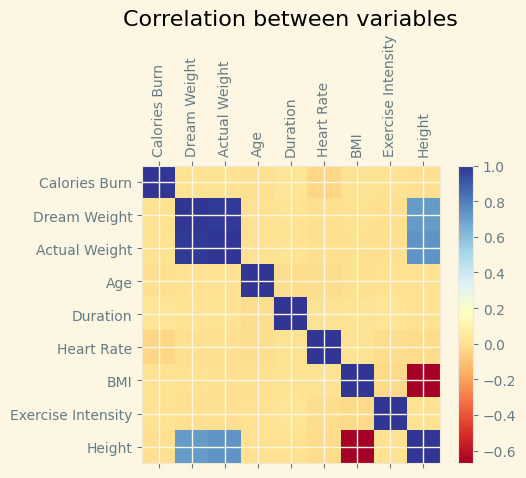

In [19]:
# Visualize correlation
cmap = plt.cm.RdYlBu
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap=cmap)

cbar = plt.colorbar(shrink=0.8)

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation between variables")

plt.show()

Observations:
* There is a strong positive correlation between actual weight and dream weight. This means that if the actual weight is higher than the dream weight is also higher. People considered in this dataset probably want to lose no more than a few kilograms.
  
* We can see a little negative correlation between heart rate and calorie burn, which means if the heart rate is lower then calorie burn is higher. Correlation in this analysis is insignificantly small.

* We can also notice some correlations with height. Correlation with BMI means that we can expect a higher BMI the shorter the height. There is also a positive connection between height and weight, which is understandable, the higher height is then the higher weight is as well.
  
* Variables in the analyzed dataset have no essential correlation with each other.

### 5. What is the distribution of actual weight in the given dataset?

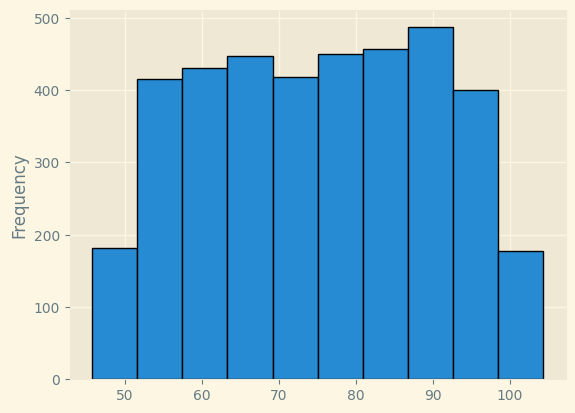

In [20]:
# Create histogram with weight of dataset
plt.style.use("Solarize_Light2")
distribution_chart = dataset["Actual Weight"].plot(kind="hist", edgecolor="black")


The above histogram appears to be normally distributed.

To make sure about this, we will use the Shapiro-Wilk test.

In [21]:
shapiro_test = dataset["Actual Weight"]
stat, p_value = shapiro(shapiro_test)

print(f"Test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("There is no reason to reject the hypothesis of normal distribution.")
else:
    print("There is reason to reject the hypothesis of normal distribution.")

Test statistic: 0.9651742577552795
P-value: 1.3930934391030027e-29
There is reason to reject the hypothesis of normal distribution.


Observations:
* The weight distribution in the studied dataset is not perfectly symmetrical.
* The lack of a normal distribution may mean that the data set is too small to draw conclusions about the wider population.

### 6. How given people are categorized in relation to their BMI?

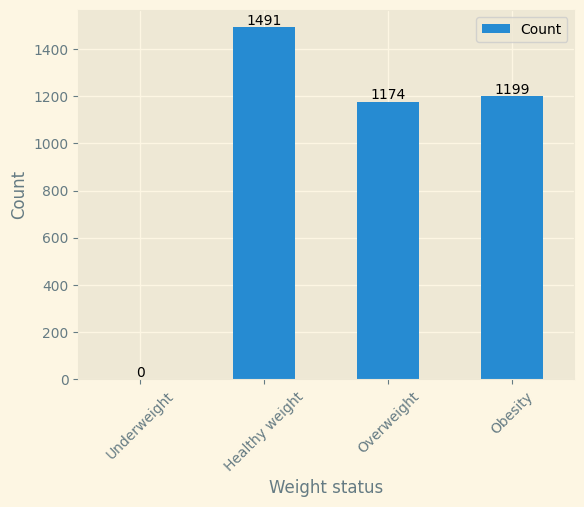

In [24]:
# Group BMI by weight status

# Create categories and cutoffs
categories = ["Underweight", "Healthy weight", "Overweight", "Obesity"]
cutoffs = [0, 18.5, 24.9, 29.9, float('inf')]

# Add new column
dataset["Weight status"] = pd.cut(dataset["BMI"], bins=cutoffs, labels=categories, right=False)

# Group by weight status
categories_grouped = dataset.groupby("Weight status")["Weight status"].count()
categories_data = categories_grouped.to_dict()
categories_df = pd.DataFrame(list(categories_data.items()), columns=["Weight status", "Count"])

# Create a bar chart with categories counts
categories_df.plot(x="Weight status", y="Count", kind="bar")
plt.style.use('Solarize_Light2')
plt.xlabel('Weight status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, value in enumerate(categories_df["Count"]):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

Observations:
* Around one-third of examined people have a healthy weight, we can see most of them weigh too much.

* None is underweight.

<hr>

## Summary of analysis

Let's sums up what we find out about this dataset.

#### Analyzed questions

1. What level of heart rate is the most recommended for people of a particular age?
2. Which exercises are the most efficient (burn the most calories)?
3. What is given people's height?
4. Is there any correlation between given variables?
5. What is the distribution of actual weight in the given dataset?
6. How given people are categorized in relation to their BMI?

#### Conclusions

* Aging lowers your maximum heart rate.

* The number of calories burned depends on the time spent on exercise and the heart rate we achieve during it. Selecting an exercise from this dataset does not affect the number of calories burned.

* Variables in the analyzed dataset have no essential correlation with each other.

* There is no normal distribution in actual weight in a given dataset. The dataset should be greater and more differential to find more information about weight impact on exercising.

* Around one-third of people in the dataset are categorized with a healthy weight. The rest of them weigh too much.